<a href="https://colab.research.google.com/github/95-sanya-95/Summer_ML_internship/blob/main/Assignment1_EDA_InJAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as jnp
import jax

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('USA_cars_datasets.csv');
df.head(5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Performing some data cleaning

In [5]:
drop_columns = ['Unnamed: 0', 'vin', 'lot']
df = df.drop(drop_columns, axis=1)

In [6]:
df.head()

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [7]:
# since cars with 0 price are of no use so remove those and the cars of condition less than 0 hours
df = df[df['price']!=0]
df = df[df['condition']!='0 hours left']

CONVERSION TO JAX ARRAYS

In [8]:
numpy_array = df.values

# Convert the NumPy array to a JAX array
# jax_array = jnp.array(numpy_array)  THIS SHOWS ERROR BCZ JAX ONLY SUPPORTS NUMERIC DATA

Since JAX does not support the string type data we need to convert all the data to numeric

In [9]:
#  Get the type of entries in a specific column
unique_entries1 = df['country'].unique()
unique_entries2 = df['state'].unique()
unique_entries3 = df['color'].unique()
unique_entries4 = df['title_status'].unique()
unique_entries5 = df['brand'].unique()
unique_entries6 = df['model'].unique()

print("Unique entries in the country:")
for entry in unique_entries1:
    print(entry)
print('-----');
print("Unique entries in the state:")
for entry in unique_entries2:
    print(entry)
print('-----');
print("Unique entries in the color:")
for entry in unique_entries3:
    print(entry)
print('-----');
print("Unique entries in the title_status:")
for entry in unique_entries4:
    print(entry)
print('-----');
print("Unique entries in the brand:")
for entry in unique_entries5:
    print(entry)
print('-----');
print("Unique entries in the model:")
for entry in unique_entries6:
    print(entry)

Unique entries in the country:
 usa
 canada
-----
Unique entries in the state:
new jersey
tennessee
georgia
virginia
florida
texas
california
north carolina
ohio
new york
pennsylvania
south carolina
michigan
washington
arizona
kentucky
massachusetts
nebraska
ontario
missouri
minnesota
connecticut
arkansas
colorado
illinois
mississippi
maryland
utah
wisconsin
oklahoma
oregon
indiana
west virginia
nevada
kansas
rhode island
louisiana
alabama
new mexico
idaho
new hampshire
montana
vermont
-----
Unique entries in the color:
black
silver
blue
red
white
gray
orange
brown
no_color
gold
charcoal
turquoise
beige
green
dark blue
phantom black
yellow
color:
toreador red
bright white clearcoat
billet silver metallic clearcoat
black clearcoat
jazz blue pearlcoat
purple
ruby red metallic tinted clearcoat
triple yellow tri-coat
competition orange
off-white
shadow black
magnetic metallic
ingot silver metallic
ruby red
royal crimson metallic tinted clearcoat
kona blue metallic
oxford white
lightning bl

Since we can see that color variety is so much so I am to exclude it but before it let us see the variation of price with color



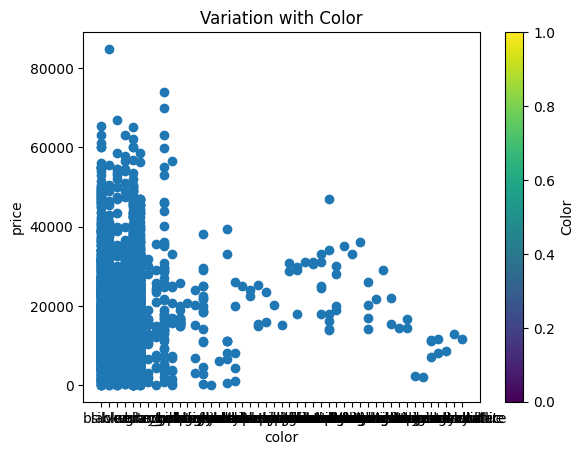

In [10]:
import matplotlib.pyplot as plt

# Plot the variation with color
plt.scatter(df['color'], df['price'])
plt.colorbar(label='Color')
plt.xlabel('color')
plt.ylabel('price')
plt.title('Variation with Color')
plt.show()

Since even at the same color price varies a lot so color is not an important factor of price prediction

In [11]:
drop_col = ['color']
df = df.drop(drop_col, axis=1)
df.head()

,price,brand,model,year,title_status,mileage,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,florida,usa,22 hours left


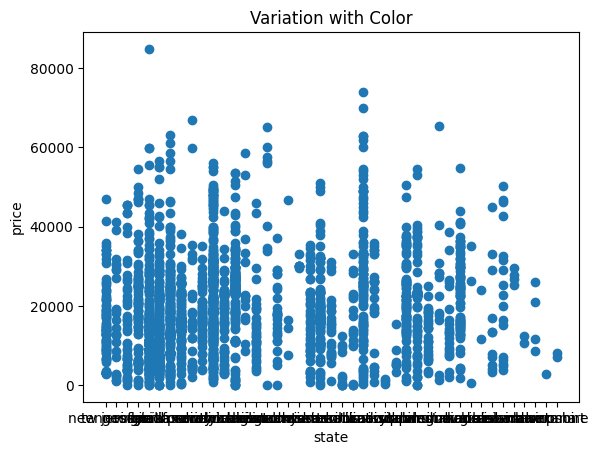

In [12]:
import matplotlib.pyplot as plt

# Plot the variation with color
plt.scatter(df['state'], df['price'])
plt.xlabel('state')
plt.ylabel('price')
plt.title('Variation with Color')
plt.show()

Since even at the same state price varies a lot so state is not an important factor of price prediction

In [13]:
drop_col = ['state']
df = df.drop(drop_col, axis=1)
df.head()

,price,brand,model,year,title_status,mileage,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,usa,22 hours left


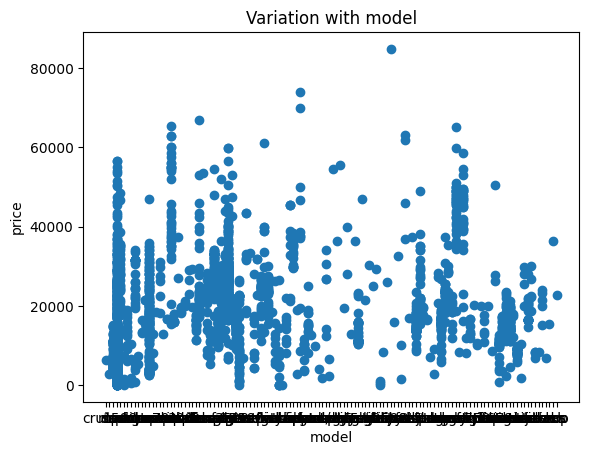

In [14]:
# Plot the variation with color
plt.scatter(df['model'], df['price'])
plt.xlabel('model')
plt.ylabel('price')
plt.title('Variation with model')
plt.show()

Since many cars's price is clearly shown to be dependent on model, we will not remove it : )

In [15]:
df['country'] = pd.to_numeric(df['country'], errors='coerce')

# Write back to CSV
df.to_csv('USA_cars_datasets.csv', index=False)
df = pd.read_csv('USA_cars_datasets.csv');
df.head(5)

,price,brand,model,year,title_status,mileage,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,NaN,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,NaN,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,NaN,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,NaN,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,NaN,22 hours left


In [21]:
# List of columns containing string data
string_columns = ['brand', 'model', 'title_status', 'country','condition']  # Update with your column names

for col in string_columns:
    unique_entries = sorted(df[col].unique())
    mapping = {entry: idx for idx, entry in enumerate(unique_entries)}
    df[col] = df[col].map(mapping)

df.head(5)

,price,brand,model,year,title_status,mileage,country,condition
0,6300,27,25,2008,0,274117.0,0,3
1,2899,8,92,2011,0,190552.0,0,39
2,5350,7,75,2018,0,39590.0,0,16
3,25000,8,32,2014,0,64146.0,0,20
4,27700,5,0,2018,0,6654.0,0,20


First I applied ASCII sum idea to convert strings to a number but some entries inspite of being different they were getting same ASCII sum... so I sorted all the unique entries and then done mapped them

In [23]:
# Now let us convert it to JAX for what we were doing all this

jax_array = jnp.array(df.values)
print(jax_array)

[[6.30000e+03 2.70000e+01 2.50000e+01 ... 2.74117e+05 0.00000e+00
  3.00000e+00]
 [2.89900e+03 8.00000e+00 9.20000e+01 ... 1.90552e+05 0.00000e+00
  3.90000e+01]
 [5.35000e+03 7.00000e+00 7.50000e+01 ... 3.95900e+04 0.00000e+00
  1.60000e+01]
 ...
 [9.20000e+03 2.40000e+01 1.19000e+02 ... 3.15940e+04 0.00000e+00
  1.90000e+01]
 [9.20000e+03 2.40000e+01 1.19000e+02 ... 3.25570e+04 0.00000e+00
  1.60000e+01]
 [9.20000e+03 2.40000e+01 1.19000e+02 ... 3.13710e+04 0.00000e+00
  1.90000e+01]]
